In [1]:
#IMPORTIN THE LIBRARIES


import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#read advertising.csv using pandas 

adv=pd.read_csv(r"C:\Users\Acharya\Downloads\datasets\advertising.csv")
print("Dataset dimensions",adv.shape,"\n")
print("Attributes include\n",adv.columns,"\n")
adv.info()

# Print the first 20 row
adv.head(20)

Dataset dimensions (1000, 10) 

Attributes include
 Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [3]:
#checking for null values 

adv.isnull().sum()   

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# OBSERVATIONS

 It was observed that the people who did not click on the ad consisted of equal male and female but more number of females clicked on the ad than the male
 
it was observed from the distplot that majority of the people who clicked on the ad are of age group ranging from 30-40  

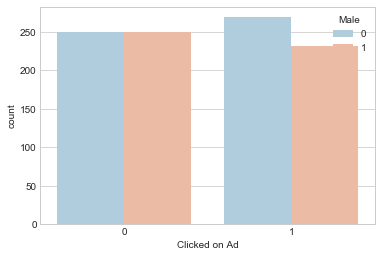

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', hue='Male', data=adv, palette='RdBu_r')

In [ ]:
# It was observed that the people who did not click on the ad consisted of equal male and female but more number of females clicked on the ad than the male 

C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


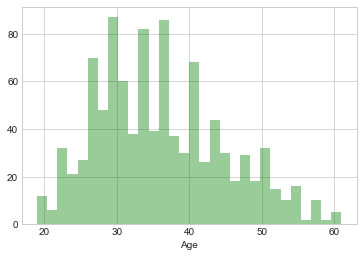

In [6]:
sns.distplot(adv['Age'].dropna(), kde=False, bins=30, color='Green')

In [ ]:
# it was observed from the distplot that majority of the people who clicked on the ad are of age group ranging from 30-40 

In [7]:
#dropping insignificant columns 

adv.drop(["Timestamp"],axis=1,inplace=True)
print("Modified Dataset dimensions after dropping insignificant columns",adv.shape,"\n")
print("Attributes include\n",adv.columns,"\n")

Modified Dataset dimensions after dropping insignificant columns (1000, 9) 

Attributes include
 Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Clicked on Ad'],
      dtype='object') 



In [8]:
#dummification : Convert categorical columns to dummies 

cat_cols = ["Ad Topic Line","City","Country"]
adv = pd.get_dummies(adv,columns=cat_cols,drop_first=True,)
print("Modified dimensions after dummification",adv.shape)

Modified dimensions after dummification (1000, 2209)


In [9]:
#dividing the data set into x and y
X = adv.copy().drop("Clicked on Ad",axis=1)
y = adv["Clicked on Ad"]
print("Input attributes X:", X.shape)
print("Input attributes X:", X.columns)
print("Output attribute y:", y.shape)

Input attributes X: (1000, 2208)
Input attributes X: Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male',
       'Ad Topic Line_Adaptive asynchronous attitude',
       'Ad Topic Line_Adaptive context-sensitive application',
       'Ad Topic Line_Adaptive contextually-based methodology',
       'Ad Topic Line_Adaptive demand-driven knowledgebase',
       'Ad Topic Line_Adaptive uniform capability',
       ...
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela', 'Country_Vietnam', 'Country_Wallis and Futuna',
       'Country_Western Sahara', 'Country_Yemen', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=2208)
Output attribute y: (1000,)


In [10]:
#splitting X and Y into X_train X_test and y_train y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Input attributes X - Train dataset:", X_train.shape)
print("Input attributes X - Test dataset:", X_test.shape)
print("Output attribute y - Train dataset:", y_train.shape)
print("Output attribute y - Test dataset:", y_test.shape)

Input attributes X - Train dataset: (800, 2208)
Input attributes X - Test dataset: (200, 2208)
Output attribute y - Train dataset: (800,)
Output attribute y - Test dataset: (200,)


In [11]:
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:5])

X_train.iloc[:,:5] = scaler.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = scaler.transform(X_test.iloc[:,:5])

C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# BUILDING LOGISTIC REGRESSION MODEL


In [12]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()                #Build the model

lrc.fit(X_train,y_train)                  #Fit the model on training dataset X & y attributes

y_pred_train_lrc = lrc.predict(X_train)   #Predict using the built model
y_pred_test_lrc = lrc.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

print("Model Accuracy is:",accuracy_score(y_true=y_test,y_pred=y_pred_test_lrc))

Model Accuracy is: 0.97


In [14]:
Predictions = lrc.predict(X_test)

In [15]:
Predictions 

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [16]:
y_test.values

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [17]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

#     return("True positives are {} False positives are {} True negatives are {} False negatives are{}".format(TP,FP,TN,FN))
    return(TP,FP,TN,FN)

In [21]:
TP,FP,TN,FN=perf_measure(y_test.values, Predictions)

In [22]:
TP

96

In [23]:
FP,TN,FN

(3, 98, 3)

In [24]:
accuracy=(TP+TN)/(TP+TN+FP+FN)

In [25]:
accuracy

0.97

In [26]:
misclass=(FP+FN)/(TP+TN+FP+FN)

In [27]:
misclass

0.03

In [28]:
Precision=TP/(TP+FP)

In [29]:
Precision

0.9696969696969697

In [30]:
Recall=TP/(TP+FN)

In [31]:
Recall

0.9696969696969697

# EXPLAINING PRECISION AND RECALL

PRECISION indicates that among all the users who claimed to click on the advertisement, 96% of them actually clicked on it
RECALL indicates that among all that users who actually clicked on the advertisement, 96% of them were identified correctly by us. 

# CHECKING THE ACCURACY WITH SVC

# BUILDING SVC MODEL

In [32]:
from sklearn.svm import SVC
svclassifier_linear = SVC(kernel='linear')
svclassifier_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
y_pred = svclassifier_linear.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[98  3]
 [ 3 96]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       101
          1       0.97      0.97      0.97        99

avg / total       0.97      0.97      0.97       200



In [ ]:
# Both the models are giving an accuracy of 97-98 %. 

# EXPLAINING MISCLASSIFICATION FP AND FN


misclassification represents that 3% of the time model incorrectly predicted the results this may be due to the outliers present in the data which were not rectified at the time of preprocessing 

FP = 3 indicates that 3 times model predicted a value to be true i.e user clicked on the advertisement but actually it was false i.e user did not click the ad

FN = 3 indicates that 3 times model predicted a value to be false i.e user did not click on the ad but actually it was True i.e user did click on it. 